# Lattice Shape

In [2]:
import numpy as np
from teaspoon.SP.texture_analysis import lattice_shape
np.random.seed(48824)
n = 10
x = np.linspace(-1, 1, n) + np.random.uniform(-0.1,0.1, n)
y = np.linspace(-1, 1, n) + np.random.uniform(-0.1,0.1, n)


xv, yv = np.meshgrid(x, y)
xv = xv.reshape(-1, 1)
yv = yv.reshape(-1, 1)

data = np.column_stack((xv, yv))
scores = lattice_shape(data)
scores

[0.014582464244091708, 0.6597959905320002]

# Depth

Computing Nominal Persistence Distribution
Nominal Persistence Computed
Computing Experimental Persistence Distribution
Experimental Persistence Computed
Cutoff Lifetime: 0.0371614954522256


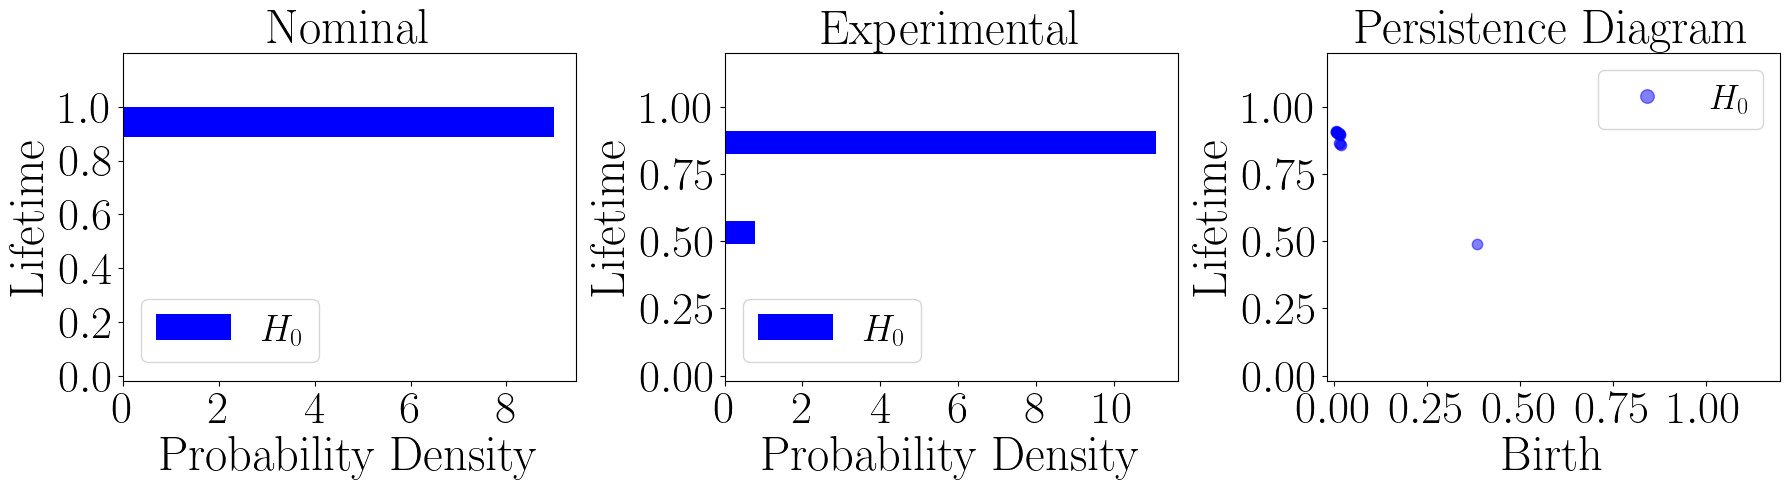

92.13

In [7]:
import numpy as np
from scipy.stats import multivariate_normal
from teaspoon.SP.texture_analysis import feature_depth

# Generate a grid of sample xy pairs
n = 500
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xv, yv = np.meshgrid(x, y)
xv = xv.reshape(-1, 1)
yv = yv.reshape(-1, 1)
xy = np.column_stack((xv, yv))
nom = 0
exp = 0
ind = 0

# Generate Grid of Strike Locations
grid_size = 4
xc = np.linspace(-0.8, 0.8, grid_size)
yc = np.linspace(-0.8, 0.8, grid_size)
xvc, yvc = np.meshgrid(xc, yc)
xvc = xvc.reshape(-1, 1)
yvc = yvc.reshape(-1, 1)
xyc = np.column_stack((xvc, yvc))


# Generate 3D surface from gaussian distribution and scale between 0-1
for point in xyc:
    ind += 1
    nom += multivariate_normal.pdf(xy, mean=np.array([point[0], point[1]]), cov=np.diag(np.array([0.1, 0.1]) ** 2))
    if ind == 6:
        exp += multivariate_normal.pdf(xy, mean=np.array([point[0], point[1]]), cov=np.diag(np.array([0.13, 0.13]) ** 2))
    else:
        exp += multivariate_normal.pdf(xy, mean=np.array([point[0], point[1]]), cov=np.diag(np.array([0.1, 0.1]) ** 2))

nom = nom.reshape(n, n).astype(np.float64)
nom = -1.0 * nom + np.max(nom)
nom = nom / np.max(nom) # scale between 0-1

exp = exp.reshape(n, n).astype(np.float64)
exp = -1.0 * exp + np.max(exp)
exp = exp / np.max(exp) # scale between 0-1



# Generate nominal and experimental images by adding noise and scaling from 0-1 again
np.random.seed(48824)
nom_im = nom
exp_im = exp + np.random.normal(scale=0.01, size=[n,n])
exp_im = (exp_im - np.min(exp_im))/(np.max(exp_im) - np.min(exp_im)) # Scale between 0-1

# Compute the depth score
score = feature_depth(nom_im, exp_im, 16, plot=True)
score

# Roundness

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np
from teaspoon.SP.texture_analysis import feature_roundness

# Generate a grid of sample xy pairs
n = 500
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
xv, yv = np.meshgrid(x, y)
xv = xv.reshape(-1, 1)
yv = yv.reshape(-1, 1)
xy = np.column_stack((xv, yv))
nom = 0
exp = 0
ind = 0

# Generate Grid of Strike Locations
grid_size = 4
xc = np.linspace(-0.8, 0.8, grid_size)
yc = np.linspace(-0.8, 0.8, grid_size)
xvc, yvc = np.meshgrid(xc, yc)
xvc = xvc.reshape(-1, 1)
yvc = yvc.reshape(-1, 1)
xyc = np.column_stack((xvc, yvc))


# Generate 3D surface from gaussian distribution and scale between 0-1
for point in xyc:
    ind += 1
    nom += multivariate_normal.pdf(xy, mean=np.array([point[0], point[1]]), cov=np.diag(np.array([0.1, 0.1]) ** 2))
    exp += multivariate_normal.pdf(xy, mean=np.array([point[0], point[1]]), cov=np.diag(np.array([0.2, 0.1]) ** 2))

nom = nom.reshape(n, n).astype(np.float64)
nom = -1.0 * nom + np.max(nom)
nom = nom / np.max(nom) # scale between 0-1

exp = exp.reshape(n, n).astype(np.float64)
exp = -1.0 * exp + np.max(exp)
exp = exp / np.max(exp) # scale between 0-1



# Generate nominal and experimental images by adding noise and scaling from 0-1 again
np.random.seed(48824)
nom_im = nom
exp_im = exp + np.random.normal(scale=0.1, size=[n,n])
exp_im = (exp_im - np.min(exp_im))/(np.max(exp_im) - np.min(exp_im)) # Scale between 0-1

# Compute the roundness score
score = feature_roundness(nom_im, exp_im, 1, 2.5, num_steps=50, plot=True)

Reference Height: 0.05749
Step 1/50: (T, EMD) = ([0.    0.005])
Step 2/50: (T, EMD) = ([0.02 0.  ])
Step 3/50: (T, EMD) = ([0.04 0.  ])
Step 4/50: (T, EMD) = ([0.06 0.  ])
Step 5/50: (T, EMD) = ([0.08 0.  ])
Step 6/50: (T, EMD) = ([0.1 0. ])
Step 7/50: (T, EMD) = ([0.12 0.  ])
Step 8/50: (T, EMD) = ([0.14 0.  ])
Step 9/50: (T, EMD) = ([0.16   0.0692])
Step 10/50: (T, EMD) = ([0.18   0.0743])
Step 11/50: (T, EMD) = ([0.2    0.0791])
Step 12/50: (T, EMD) = ([0.22   0.0837])
Step 13/50: (T, EMD) = ([0.24   0.0885])
Step 14/50: (T, EMD) = ([0.27   0.0933])
Step 15/50: (T, EMD) = ([0.29   0.0974])
Step 16/50: (T, EMD) = ([0.31   0.1015])
Step 17/50: (T, EMD) = ([0.33  0.106])
Step 18/50: (T, EMD) = ([0.35   0.1106])
Step 19/50: (T, EMD) = ([0.37   0.1137])
Step 20/50: (T, EMD) = ([0.39   0.1179])
Step 21/50: (T, EMD) = ([0.41  0.122])
Step 22/50: (T, EMD) = ([0.43   0.1261])
Step 23/50: (T, EMD) = ([0.45   0.1305])
Step 24/50: (T, EMD) = ([0.47   0.1347])
Step 25/50: (T, EMD) = ([0.49   0.1